In [1]:
pip install rembg

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.5/40.5 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 3.6 MB/s eta 0:00:00


In [2]:
!pip install onnxruntime

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 75.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 6.1 MB/s eta 0:00:00


In [3]:
from google.colab import drive
import os
from pathlib import Path
from PIL import Image
from rembg import remove
import numpy as np
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt
from io import BytesIO
from tensorflow.keras.models import load_model

In [4]:
drive.mount('/content/drive')
dataset= '/content/drive/MyDrive/Plant_Disease'
print(os.listdir(dataset))

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
['VGG-19.ipynb', 'Apple_valid', 'training_history.json', 'Hybrid-Vgg-19-DepthRes.ipynb', 'training_history_4096.json', 'training_history_2048.json', 'File-uploads.ipynb', 'Testing', 'training_history_512.json', 'Apple_2', 'Apple_3', 'VGG-19-Depthwise.ipynb', 'Apple', 'training_history_512_2.json', 'training_history_512_2_1.json', 'u2net_portrait.pth', 'bg-removed', 'Apple_bg_removed', 'Apple_valid_bg_removed', 'training_history_64.json', 'Apple_Testing', 'Apple_Testing_bg_removed', 'Testing_bg_removed', 'Testing_apple', 'Testing_bg_removed_2', 'Apple_Disease_4classes_64.json', 'Apple_Disease_4classes_64.keras', 'Apple_Disease_4classes_64_weights.weights.h5', 'Testing test set.ipynb', 'Apple_Disease_4classes_64_2.json', 'Apple_Disease_4classes_64_2.keras', 'Apple_Disease_4classes_64_weights_2.weights.h5']


In [5]:
model=load_model("/content/drive/MyDrive/Plant_Disease/Apple_Disease_4classes_64_2.keras")

In [6]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 224, 224, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ depthwise_conv2d          │ (None, 224, 224, 3)    │             30 │ input_layer[0][0]      │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d (Conv2D)           │ (None, 224, 224, 64)   │            256 │ depthwise_conv2d[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation (Activation)   │ (None, 224, 224, 64)   │              0 │ conv2d[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ depthwise_conv2d_1        │ (None, 224, 224, 64)   │            640 │ activation[0][0]       │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_1 (Activation) │ (None, 224, 224, 64)   │              0 │ depthwise_conv2d_1[0]… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_1 (Conv2D)         │ (None, 224, 224, 64)   │          4,160 │ activation_1[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_2 (Activation) │ (None, 224, 224, 64)   │              0 │ conv2d_1[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d             │ (None, 112, 112, 64)   │              0 │ activation_2[0][0]     │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ depthwise_conv2d_2        │ (None, 112, 112, 64)   │            640 │ max_pooling2d[0][0]    │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_3 (Activation) │ (None, 112, 112, 64)   │              0 │ depthwise_conv2d_2[0]… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_3 (Conv2D)         │ (None, 112, 112, 128)  │          8,320 │ activation_3[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ depthwise_conv2d_3        │ (None, 112, 112, 128)  │          1,280 │ conv2d_3[0][0]         │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_4 (Activation) │ (None, 112, 112, 128)  │              0 │ depthwise_conv2d_3[0]… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_4 (Conv2D)         │ (None, 112, 112, 128)  │         16,512 │ activation_4[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_2 (Conv2D)         │ (None, 112, 112, 128)  │          8,320 │ max_pooling2d[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add (Add)                 │ (None, 112, 112, 128)  │              0 │ conv2d_4[0][0],        │
│                      

 Total params: 368,606,120 (1.37 GB)

 Trainable params: 122,868,706 (468.71 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 245,737,414 (937.41 MB)

In [7]:
dataset= '/content/drive/MyDrive/Plant_Disease'
print(os.listdir(dataset))
train_dir = os.path.join(dataset, 'Apple')

['VGG-19.ipynb', 'Apple_valid', 'training_history.json', 'Hybrid-Vgg-19-DepthRes.ipynb', 'training_history_4096.json', 'training_history_2048.json', 'File-uploads.ipynb', 'Testing', 'training_history_512.json', 'Apple_2', 'Apple_3', 'VGG-19-Depthwise.ipynb', 'Apple', 'training_history_512_2.json', 'training_history_512_2_1.json', 'u2net_portrait.pth', 'bg-removed', 'Apple_bg_removed', 'Apple_valid_bg_removed', 'training_history_64.json', 'Apple_Testing', 'Apple_Testing_bg_removed', 'Testing_bg_removed', 'Testing_apple', 'Testing_bg_removed_2', 'Apple_Disease_4classes_64.json', 'Apple_Disease_4classes_64.keras', 'Apple_Disease_4classes_64_weights.weights.h5', 'Testing test set.ipynb', 'Apple_Disease_4classes_64_2.json', 'Apple_Disease_4classes_64_2.keras', 'Apple_Disease_4classes_64_weights_2.weights.h5']


In [8]:
training_set = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    labels="inferred",
    label_mode="categorical",
    image_size=(224, 224)
)

class_names = training_set.class_names
print(f"Class names: {class_names}")

Found 7040 files belonging to 4 classes.
Class names: ['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy']


In [9]:
def compute_gradcam(model, img_array, target_layer_name, class_idx, original_img_shape):
    grad_model = tf.keras.models.Model(
        inputs=[model.inputs],
        outputs=[model.get_layer(target_layer_name).output, model.output]
    )

    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_array)
        loss = predictions[:, class_idx]

    grads = tape.gradient(loss, conv_outputs)
    weights = tf.reduce_mean(grads, axis=(0, 1))
    cam = tf.reduce_sum(weights * conv_outputs[0], axis=-1)

    cam = tf.maximum(cam, 0)
    cam = cam / tf.reduce_max(cam)
    cam = tf.image.resize(cam[..., tf.newaxis], (original_img_shape[0], original_img_shape[1]))
    return cam.numpy()

In [10]:
image_path = '/content/drive/MyDrive/Plant_Disease/Testing/Apple___Cedar_apple_rust/30.jpg'

In [11]:
with open(image_path, "rb") as img_file:
    input_image = img_file.read()
output_image = remove(input_image)

100%|███████████████████████████████████████| 176M/176M [00:00<00:00, 97.8GB/s]


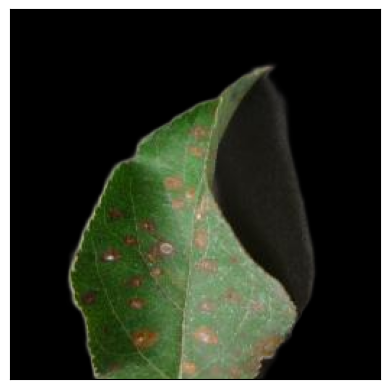

In [12]:
background_removed_image = Image.open(BytesIO(output_image))

img = np.array(background_removed_image)
if img.shape[-1] == 4:
    img = cv2.cvtColor(img, cv2.COLOR_RGBA2RGB)
plt.imshow(img)
plt.xticks([])
plt.yticks([])
plt.show()

In [13]:
image = background_removed_image.resize((224, 224))
image = image.convert('RGB')
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])

predictions = model.predict(input_arr)
predicted_class = np.argmax(predictions, axis=1)[0]
print(f"Model Prediction - Predicted Class Index: {predicted_class}")
print(f"Model Prediction - Predicted Class Name: {class_names[predicted_class]}")
print(f"Class Probabilities: {predictions[0]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
Model Prediction - Predicted Class Index: 2
Model Prediction - Predicted Class Name: Apple___Cedar_apple_rust
Class Probabilities: [2.1843954e-03 2.8024529e-05 9.9778521e-01 2.3462567e-06]


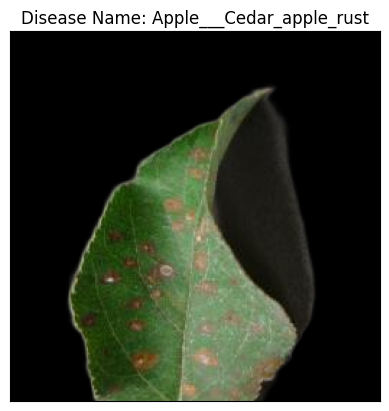

In [14]:
model_prediction = class_names[predicted_class]
plt.imshow(img)
plt.title(f"Disease Name: {model_prediction}")
plt.xticks([])
plt.yticks([])
plt.show()

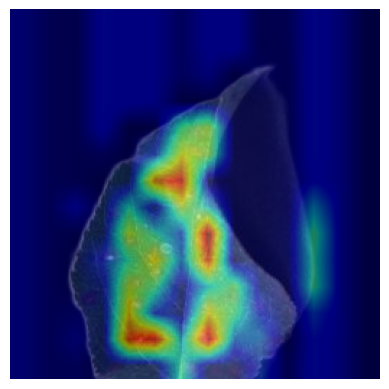

In [15]:
original_img_shape = img.shape[:2]  # Height and Width of the original image
target_layer_name = "conv2d_20"
cam = compute_gradcam(model, input_arr, target_layer_name, predicted_class, original_img_shape)
plt.imshow(img / 255.0)  # Original image
plt.imshow(cam.squeeze(), cmap="jet", alpha=0.5)  # Grad-CAM heatmap overlay resized to original image
plt.axis('off')
plt.show()